Chapter 8 - Calculating average flow rate from volume
=====================================================

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### 0. Helper Functions

In [2]:

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [3]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

### 8.1. Calculating average flow rates from volumes

In [4]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

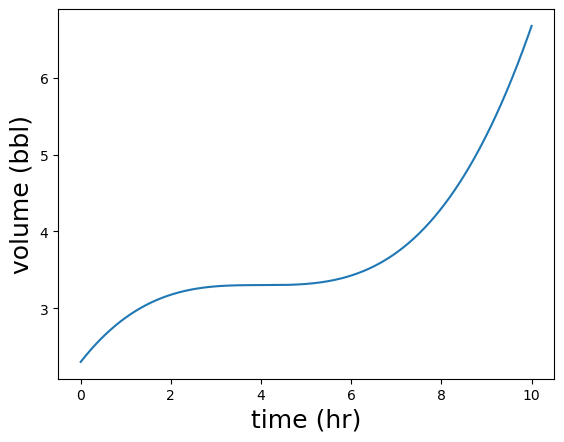

In [5]:
plot_volume(volume,0,10)

#### 8.1.1 Implementing an average flow rate function

In [6]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

t1 = 4
t2 = 9

print(f"{t1=}")
print(f"{volume(t1)=}")

print(f"{t2=}")
print(f"{volume(t2)=}")

print(f"{average_flow_rate(volume, t1, t2)=}")

t1=4
volume(t1)=3.3
t2=9
volume(t2)=5.253125
average_flow_rate(volume, t1, t2)=0.390625


#### 8.1.3 Negative rates of change

In [7]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

t1 = 0
t2 = 4

print(f"{t1=}")
print(f"{decreasing_volume(t1)=}")

print(f"{t2=}")
print(f"{decreasing_volume(t2)=}")

print(f"{average_flow_rate(decreasing_volume, t1, t2)=}")


t1=0
decreasing_volume(t1)=10.0
t2=4
decreasing_volume(t2)=6.8
average_flow_rate(decreasing_volume, t1, t2)=-0.8


#### 8.1.4 Exercises

In [8]:
##### Exercise 8.1

t1 = 0
t2 = 4.5
o1 = 77_641
o2 = 77_905

def average_speed(t1, o1, t2, o2):
    return (o2 -o1) / (t2 - t1)

print(f"{t1=} hours")
print(f"{o1=} miles")

print(f"{t2=} hours")
print(f"{o2=} miles")

print(f"{average_speed(t1, o1, t2, o2)=:.1f} miles per hour")

t1=0 hours
o1=77641 miles
t2=4.5 hours
o2=77905 miles
average_speed(t1, o1, t2, o2)=58.7 miles per hour


In [9]:
###### Exercise 8.2

def sectant_line(f, x1, x2):
    def line(x):
        return f(x1) + (x-x1) * ( f(x2) - f(x1) ) / (x2 - x1)
    return line

In [10]:
###### Exercise 8.3

def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    plot_function(line, x1, x2, c=color)
    plt.scatter([x1, x2], [f(x1), f(x2)], c=color)

#### 8.2 Plotting the average flow rate over time

In [11]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [12]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t, average_flow_rate(v,t,t+dt)) for t in np.arange(t1,t2,dt)]

interval_flow_rates(volume, 0, 10, 1)

[(np.int64(0), np.float64(0.578125)),
 (np.int64(1), np.float64(0.296875)),
 (np.int64(2), np.float64(0.109375)),
 (np.int64(3), np.float64(0.015625)),
 (np.int64(4), np.float64(0.015625)),
 (np.int64(5), np.float64(0.109375)),
 (np.int64(6), np.float64(0.296875)),
 (np.int64(7), np.float64(0.578125)),
 (np.int64(8), np.float64(0.953125)),
 (np.int64(9), np.float64(1.421875))]

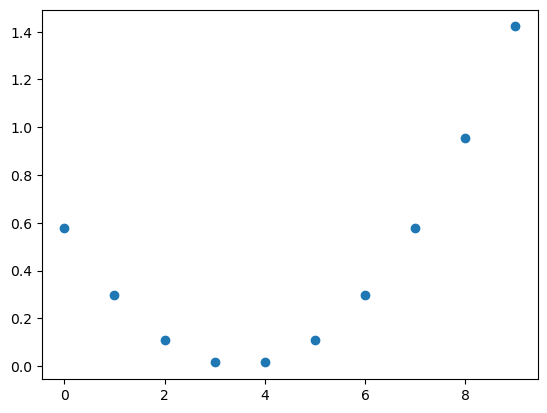

In [13]:
def plot_interval_flow_rates(volume, t1, t2, dt):
    series = interval_flow_rates(volume, t1, t2, dt)
    times = [t for (t, _) in series]
    rates = [q for (_, q) in series]
    plt.scatter(times, rates)

plot_interval_flow_rates(volume, 0, 10, 1)

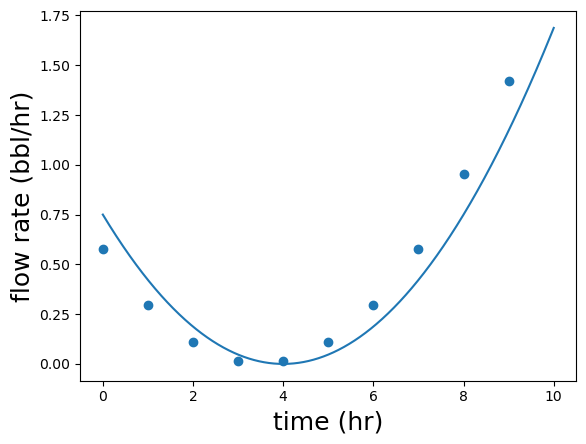

In [14]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1)

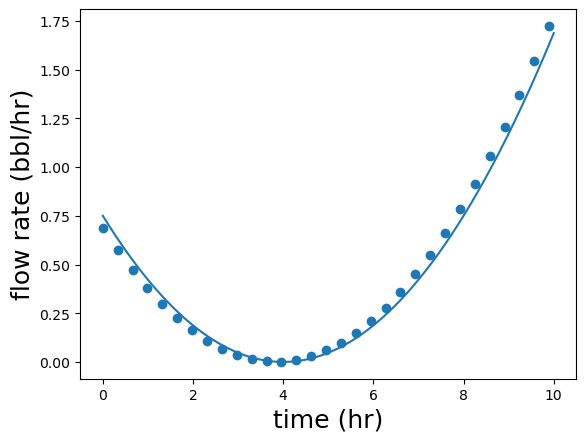

In [15]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,.33)

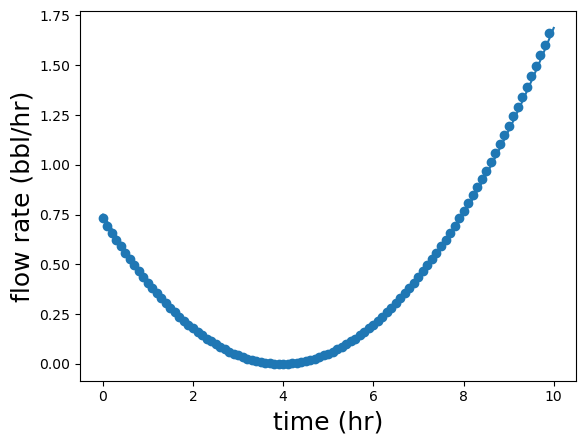

In [16]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,.1)

#### 8.2.3 Exercises

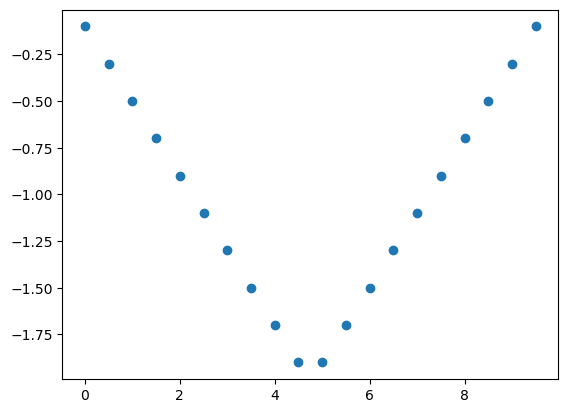

In [17]:
##### Exercise 8.4
plot_interval_flow_rates(decreasing_volume,0,10,.5)

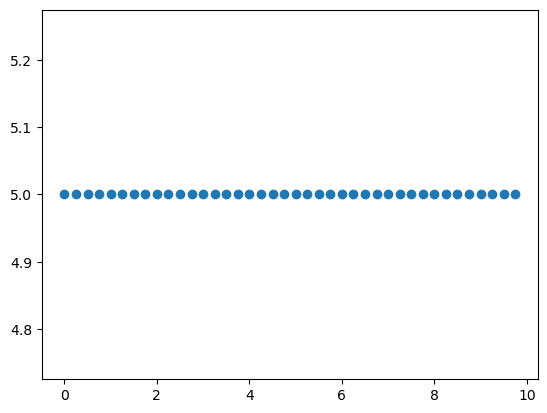

In [18]:
##### Exercise 8.5
def linear_volume_function(t):
    return 5*t + 3

plot_interval_flow_rates(linear_volume_function, 0,10,0.25)

#### 8.3.1 Finding the slope of small secant lines

In [19]:
print(f"{average_flow_rate(volume,0.5,1.5)=}")
print(f"{average_flow_rate(volume,0.9,1.1)=}")
print(f"{average_flow_rate(volume,0.99,1.01)=}")
print(f"{average_flow_rate(volume,0.999,1.001)=}")
print(f"{average_flow_rate(volume,0.9999,1.0001)=}")
print(f"{average_flow_rate(volume,0.99999,1.00001)=}")

average_flow_rate(volume,0.5,1.5)=0.42578125
average_flow_rate(volume,0.9,1.1)=0.4220312499999988
average_flow_rate(volume,0.99,1.01)=0.42187656249998945
average_flow_rate(volume,0.999,1.001)=0.42187501562509583
average_flow_rate(volume,0.9999,1.0001)=0.42187500015393936
average_flow_rate(volume,0.99999,1.00001)=0.4218750000002602


In [20]:
flow_rate(1)

0.421875

#### 8.3.2 Building the instantaneous flow rate function

In [21]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v, t-h, t+h)
    for i in range(0, 2**digits):
        h = h / 10
        next_approx = average_flow_rate(v, t-h, t+h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

instantaneous_flow_rate(volume, 1)

0.421875

#### 8.3.3 Currying and plotting the instantaneous flow rate function

In [22]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v,t)
    return flow_rate_function

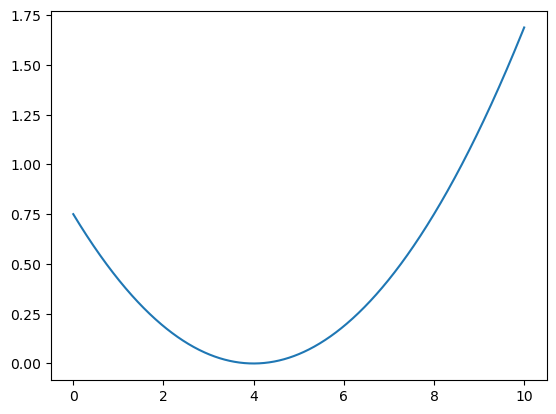

In [23]:
plot_function(flow_rate, 0, 10)
plot_function(get_flow_rate_function(volume), 0, 10)

#### 8.4.1 Finding the change in volume for a short time interval

In [33]:
def small_volume_change(q, t, dt):
    return q(t) * dt

print(f"{small_volume_change(flow_rate, 2, 1)=}")
print(f"{volume(3)=} - {volume(2)=} = {volume(3) - volume(2)}")
print()
print(f"{small_volume_change(flow_rate, 2, 0.01)=}")
print(f"{volume(2.01)=} - {volume(2)=} = {volume(2.01) - volume(2)}")

small_volume_change(flow_rate, 2, 1)=0.1875
volume(3)=3.284375 - volume(2)=3.175 = 0.109375

small_volume_change(flow_rate, 2, 0.01)=0.001875
volume(2.01)=3.176865640625 - volume(2)=3.175 = 0.0018656406250001645


In [37]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

print(f"{volume_change(flow_rate, 0, 10, 0.1)=}")
print(f"{volume_change(flow_rate, 0, 10, 0.0001)=}")
print(f"{volume(10) - volume(0)=}")



volume_change(flow_rate, 0, 10, 0.1)=np.float64(4.32890625)
volume_change(flow_rate, 0, 10, 0.0001)=np.float64(4.3749531257812455)
volume(10) - volume(0)=4.375


#### 8.4.4 Exercises

In [40]:
##### Exercise 8.9
t1 = 0
t2 = 6
t3 = 4

# first 6 hours
print(f"{volume_change(flow_rate, t1, t2, 0.01)=}")
# last 6 hours
print(f"{volume_change(flow_rate, t1 + t2, t2 + t3, 0.01)=}")

volume_change(flow_rate, t1, t2, 0.01)=np.float64(1.1278171874999996)
volume_change(flow_rate, t1 + t2, t2 + t3, 0.01)=np.float64(3.2425031249999257)


#### 8.5.1 Finding the volume over time

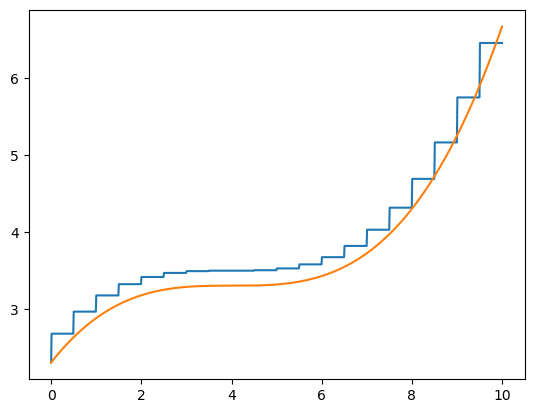

In [43]:
def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

plot_function(approximate_volume_function(flow_rate, 2.3, 0.5), 0, 10)
plot_function(volume, 0, 10)

#### 8.5.3 Improving the approximation

In [47]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q, 0, T, dt)
        for i in range(0, digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, T, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx, digits)
            else:
                approx = next_approx
        raise Exception("Function not converge")
    return volume_function


v = get_volume_function(flow_rate, 2.3, digits=3)
print(f"{v(1)=}")
v = get_volume_function(flow_rate, 2.3, digits=6)
print(f"{v(1)=}")

v(1)=np.float64(2.878)
v(1)=np.float64(2.878125)
